## Confusion Matrices for Owl classes

The confusion matrices displayed here were build for those owl classes that do have exampled from ARUs present in the test and train set but that they were not detected yet in the field data.

In [3]:
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [4]:
# Load data
root_dir = Path('/mnt/d/retraining_BirdNET_2025/model_test')
true_df = pd.read_csv(root_dir / 'input_ready/one-hot-encoded_validation.csv')
pred_df = pd.read_csv(root_dir / 'results/model_9_old-params_06132025/m9_old-params_predicted_labels.csv')

In [5]:
# Convert prediction scores to binary (1 if > 0, else 0)
pred_binary = pred_df.copy()  # full copy of original including file/start/end/owls
pred_binary.iloc[:, 3:] = (pred_df.iloc[:, 3:] > 0).astype(int) #updates only the owl class columns (from the 4th column onward).

In [6]:
# Define the owl classes you're interested in
owl_indices = [4, 9, 10, 19, 21]
owl_names = [
    'Rusty-barred Owl_song',
    'Black-capped Screech-Owl',
    'Long-tufted Screech-Owl',
    'Mottled Owl_song',
    'Tawny-browed Owl'
]

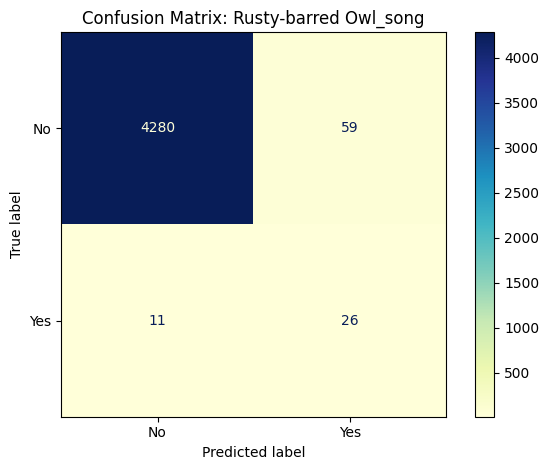

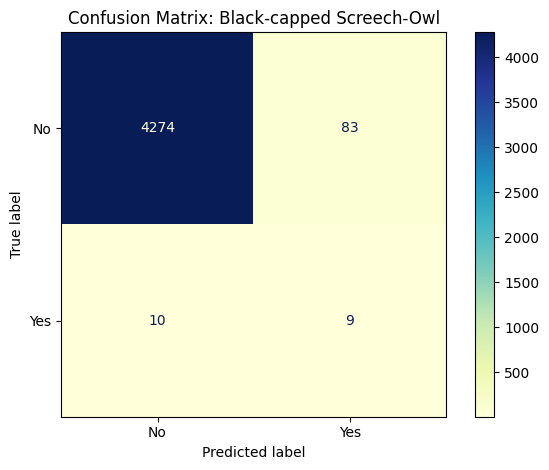

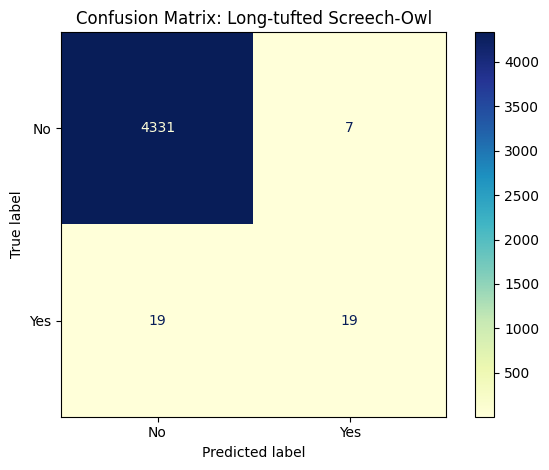

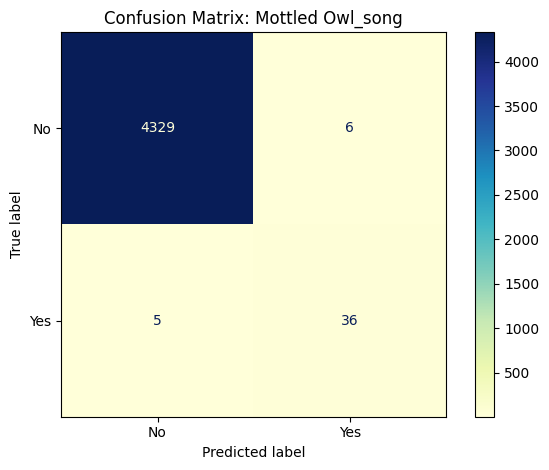

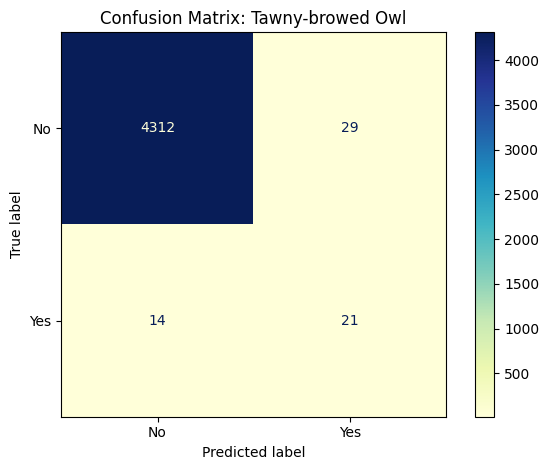

In [7]:
# Loop through and display confusion matrices
for idx, name in zip(owl_indices, owl_names):
    y_true = true_df.iloc[:, idx]
    y_pred = pred_binary.iloc[:, idx]
    
    cm = confusion_matrix(y_true, y_pred)

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["No", "Yes"]
    )
    
    disp.plot(cmap='YlGnBu', values_format='d')
    plt.title(f'Confusion Matrix: {name}')
    plt.tight_layout()
    plt.show()